# PREPROCESSING DATA

## IMPORT LIBRARIES

In [786]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## READING THE DATASET

In [787]:
df = pd.read_csv("ParisHousingClass.csv")

## DATA OVERVIEW

In [788]:
df.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


## CHECKING THE MISSING DATA

In [789]:
#checking null num
df.isnull().sum()

squareMeters         0
numberOfRooms        0
hasYard              0
hasPool              0
floors               0
cityCode             0
cityPartRange        0
numPrevOwners        0
made                 0
isNewBuilt           0
hasStormProtector    0
basement             0
attic                0
garage               0
hasStorageRoom       0
hasGuestRoom         0
price                0
category             0
dtype: int64

In [790]:
#information data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

## SPILITING DATA

In [808]:
# Separate features (X) and target variable (y)
X = df.drop('category', axis = 1) # Features: all columns except 'category'
y = df['category']                # Target: 'category' column

In [809]:
y

0        Basic
1       Luxury
2        Basic
3        Basic
4       Luxury
         ...  
9995     Basic
9996     Basic
9997     Basic
9998     Basic
9999     Basic
Name: category, Length: 10000, dtype: object

In [810]:
from sklearn.model_selection import train_test_split

# Split the data first (this defines 'train' and 'test')
#train, test = train_test_split(df, test_size=0.4, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [811]:
#transform the 'status' column to a binary column(Encoding)
df["status_binary"] = df["category"].apply(lambda x: 1 if x == "Luxury" else 0)
print(df["status_binary"].value_counts())

status_binary
0    8735
1    1265
Name: count, dtype: int64


# SCALLING DATA

In [812]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)  # Fit only on training data

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [813]:
print(X_train_scaled)

[[ 1.1189976   0.22279829 -1.01460667 ... -0.93962897  1.11854273
  -0.37990581]
 [ 1.02094519  1.2987203  -1.01460667 ... -0.62348178  1.02058598
  -0.37990581]
 [ 0.99548658  0.70869855  0.98560362 ...  0.32495979  0.99897119
   2.63223141]
 ...
 [ 1.72058417  0.60457706  0.98560362 ... -0.30733459  1.72073412
  -0.37990581]
 [-1.13900939 -0.15898049  0.98560362 ... -0.93962897 -1.13954331
   2.63223141]
 [-1.60833026  1.15989165  0.98560362 ...  1.58954856 -1.60704115
  -0.37990581]]


In [814]:
print(X_test_scaled)

[[ 1.04973057 -1.5125598   0.98560362 ... -1.25577616  1.05066604
  -0.37990581]
 [-0.43877509  0.98635584  0.98560362 ...  0.0088126  -0.43792707
   2.63223141]
 [ 1.25714645 -0.50605211  0.98560362 ...  0.64110698  1.256805
  -0.37990581]
 ...
 [-1.05513956 -0.99195237  0.98560362 ...  0.0088126  -1.05630553
  -0.37990581]
 [-0.70684338 -0.29780914  0.98560362 ...  1.27340137 -0.70731167
  -0.37990581]
 [ 0.72731323 -1.13078102  0.98560362 ...  0.0088126   0.72756576
  -0.37990581]]


In [815]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k='all')  # You can use k=2 or 3 to limit features
X_new = selector.fit_transform(X_train_scaled, y_train)

# To see scores:
feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})
feature_scores.sort_values(by='Score', ascending=False)

,Feature,Score
17,status_binary,1.145784e+17
3,hasPool,1.369720e+03
9,isNewBuilt,1.365715e+03
2,hasYard,1.304193e+03
12,attic,3.021762e+00
0,squareMeters,1.651245e+00
16,price,1.560131e+00
7,numPrevOwners,1.293976e+00
6,cityPartRange,1.027056e+00
8,made,6.775721e-01


## BALANCING DATA

In [816]:
from imblearn.over_sampling import SMOTE  # Import SMOTE for balancing the dataset

# Initialize SMOTE with a fixed random state for reproducibility
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples for the minority class
X_resampled, y_resampled = smote.fit_resample(X, y)


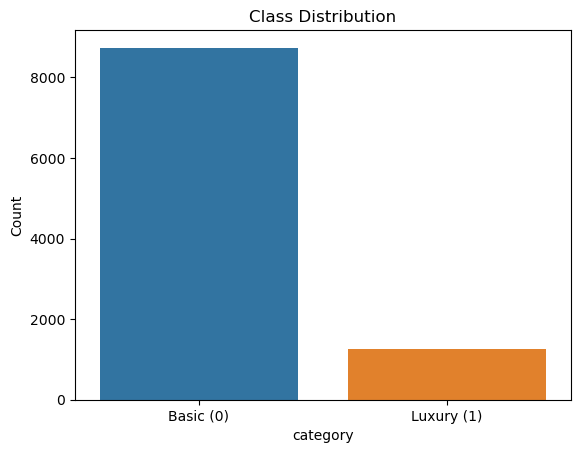

In [817]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot showing the count of each class in the 'category' column
sns.countplot(x='category', data=df)

# Set the title of the plot
plt.title('Class Distribution')

# Replace x-axis ticks with meaningful labels for each class
plt.xticks(ticks=[0, 1], labels=['Basic (0)', 'Luxury (1)'])

# Label the y-axis as 'Count' to show number of samples per class
plt.ylabel('Count')

# Display the plot
plt.show()


In [818]:
# After SMOTE
from collections import Counter

print(Counter(y_resampled))


Counter({'Basic': 8735, 'Luxury': 8735})


# MODELING DATA

## KKN MODELING

In [821]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Initialize the KNN model with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train_scaled, y_train)

# Predict on the test data
y_pred = knn.predict(X_test_scaled)

# Evaluate and print accuracy
score = metrics.accuracy_score(y_test, y_pred)
print(f"KNN Accuracy with k=5: {score:.3f}")


KNN Accuracy with k=5: 1.000


In [822]:
#
from sklearn.metrics import classification_report , confusion_matrix
print( confusion_matrix (y_test , y_pred))

[[1744    0]
 [   0  256]]


In [823]:
#FINAL MODEL
print( classification_report(y_test , y_pred)) 

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      1744
      Luxury       1.00      1.00      1.00       256

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



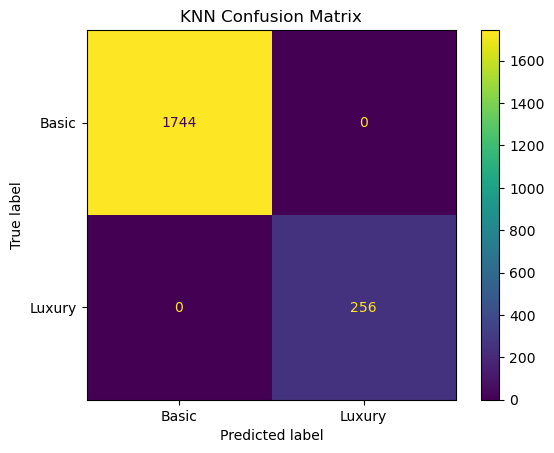

In [824]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

ConfusionMatrixDisplay.from_estimator(knn, X_test_scaled, y_test)
plt.title("KNN Confusion Matrix")
plt.show()

The optimal number of neighbors is 18
The optimal score is 0.87


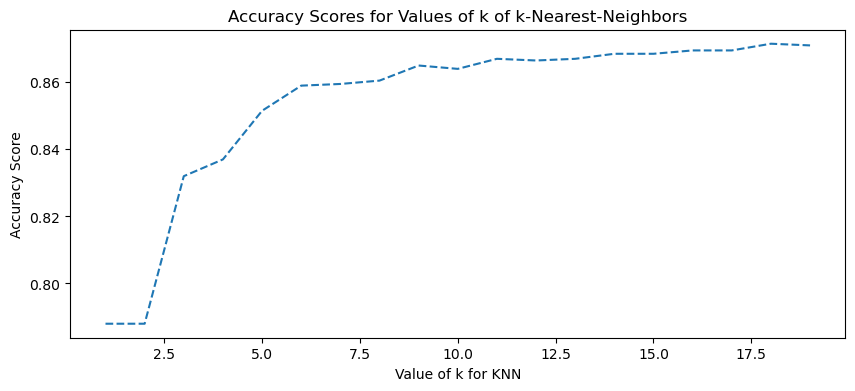

In [825]:
import matplotlib.pyplot as plt # library for plotting
import warnings # to hide unnecesary warning
warnings.filterwarnings('ignore')
# line required for inline charts/plots
%matplotlib inline

# empty variable for storing the KNN metrics
scores=[]

# We try different values of k for the KNN (from k=1 up to k=20)
lrange=list(range(1,20))

# loop the KNN process
for k in lrange:
    # input the k value and 'distance' measure
    knn=KNeighborsClassifier(n_neighbors=k, weights='distance', algorithm='auto')
    
    # input the train data to train KNN
    knn.fit(X_train,y_train)
    
    # see KNN prediction by inputting the test data
    y_pred=knn.predict(X_test)
    
    # append the performance metric (accuracy)
    scores.append(metrics.accuracy_score(y_test,y_pred))
    optimal_k = lrange[scores.index(max(scores))]

print("The optimal number of neighbors is %d" % optimal_k)
print("The optimal score is %.2f" % max(scores))
plt.figure(2,figsize=(10,4))

# plot the results
plt.plot(lrange, scores,ls='dashed')
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [826]:
#CLASSIFICATION REPORT
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      1744
      Luxury       0.00      0.00      0.00       256

    accuracy                           0.87      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.76      0.87      0.81      2000



# DECISION TREE MODELING

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      1744
      Luxury       0.00      0.00      0.00       256

    accuracy                           0.87      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.76      0.87      0.81      2000



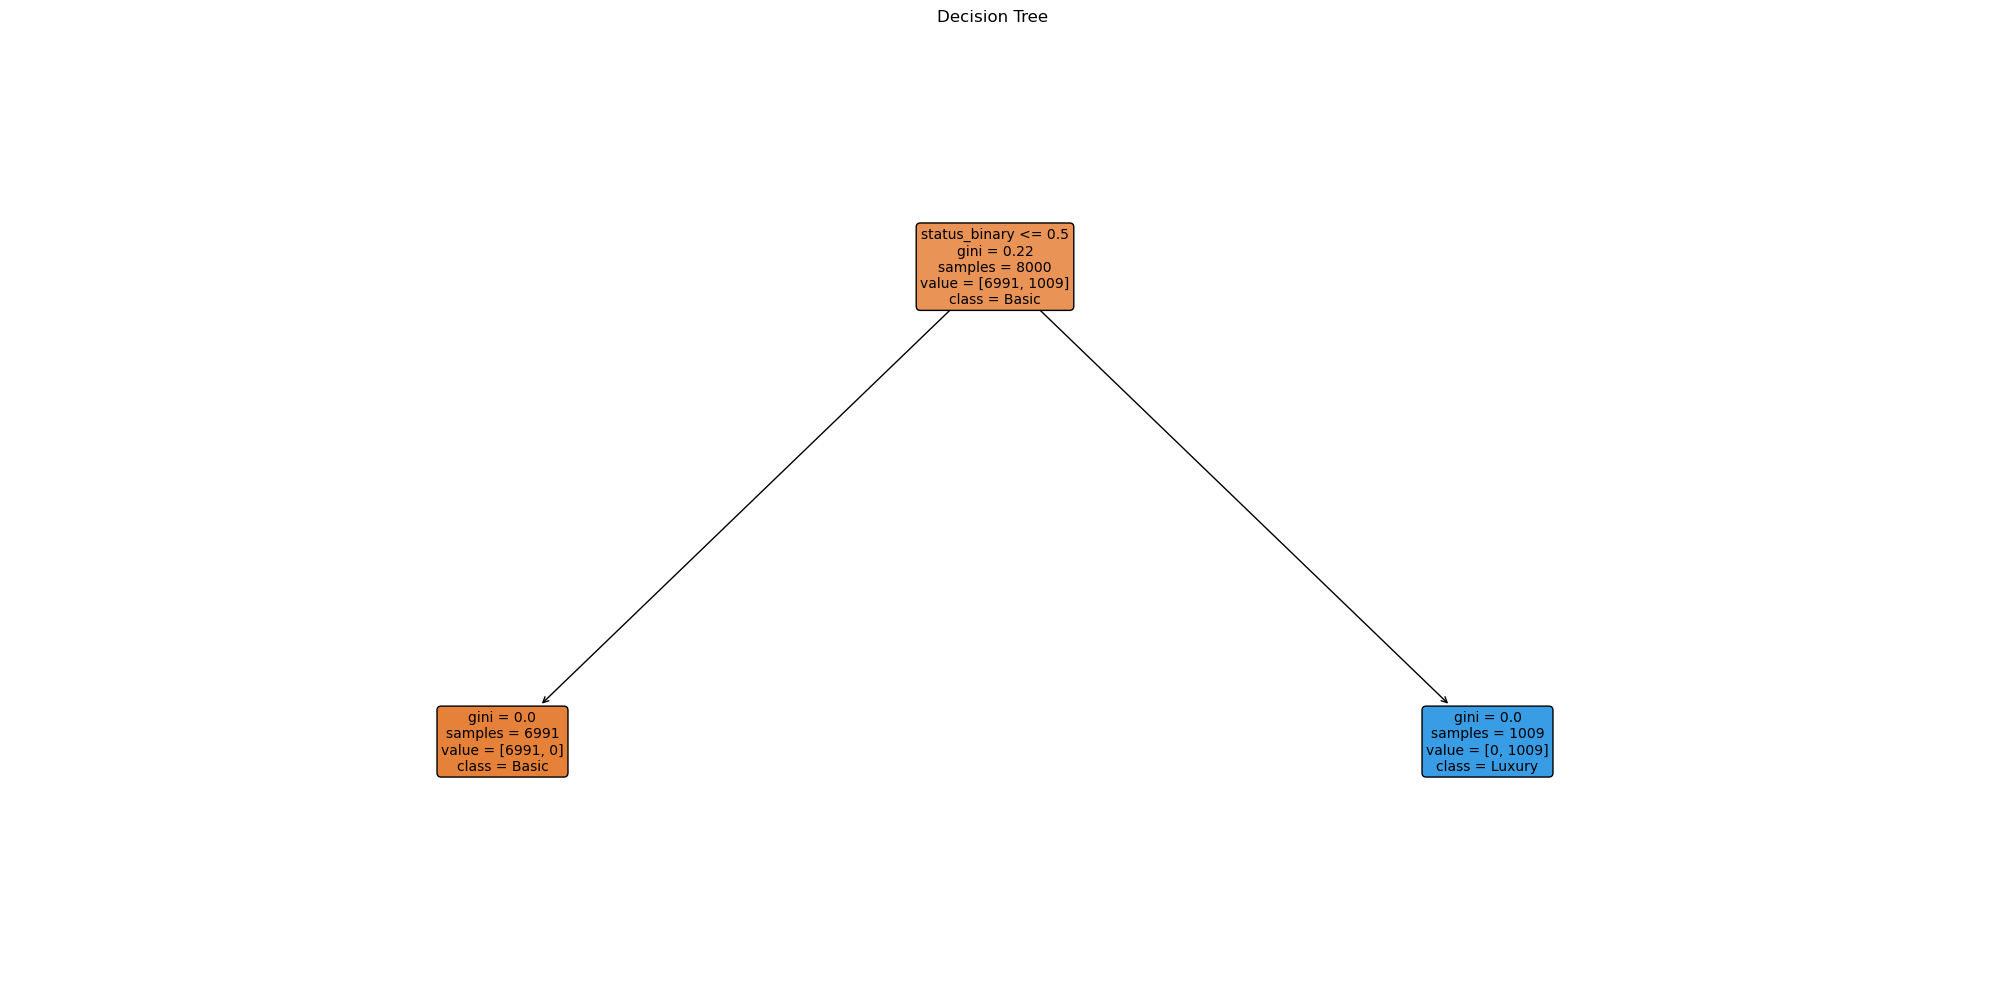

In [827]:
#POLITING THE DECISION TREE
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# Example: training the decision tree (skip if already done)
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

# Get feature and class names
fn = X_train.columns.tolist()  # feature names from your DataFrame
cn = dtree.classes_.astype(str).tolist()  # class names from your model

# Plot the tree
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(20, 10), dpi=100)
plot_tree(dtree, 
          filled=True, 
          feature_names=fn, 
          class_names=cn, 
          rounded=True,
          fontsize=10)

plt.title("Decision Tree ")
plt.tight_layout()
fig.savefig('decision_tree.png')
plt.show(print(classification_report(y_test, y_pred)))

In [807]:
#CLASSIFICATION REPORT
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      1744
      Luxury       0.00      0.00      0.00       256

    accuracy                           0.87      2000
   macro avg       0.44      0.50      0.47      2000
weighted avg       0.76      0.87      0.81      2000



# THANK YOU